# **(ADD HERE THE NOTEBOOK NAME)**

## Objectives

* Write here your notebook objective, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Film_Hit_prediction/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Film_Hit_prediction'

# Load Data


Section 1 content

In [16]:
import pandas as pd

df_movies = pd.read_csv('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/datasets/collection/merged_movie_data.csv')

print(df_movies.head().to_string(index=False))

   budget                                                                                                                                 genres                                     homepage     id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    keywords original_language                      

---

# Data Exploration

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business contextSection 2 content

In [6]:
%pip install ydata-profiling


Note: you may need to restart the kernel to use updated packages.


In [18]:
from ydata_profiling import ProfileReport
import pandas as pd

df_movies = pd.read_csv('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/datasets/collection/merged_movie_data.csv') 


pandas_report = ProfileReport(df=df_movies, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

# Correlation Study

Subset data

In [19]:
# High revenue movies (top 25%)
high_revenue = df_movies[df_movies['revenue'] >= df_movies['revenue'].quantile(0.75)]

# Low revenue movies (bottom 25%)
low_revenue = df_movies[df_movies['revenue'] <= df_movies['revenue'].quantile(0.25)]

print("\nNumber of high revenue movies:", len(high_revenue))
print("Number of low revenue movies:", len(low_revenue))


Number of high revenue movies: 1201
Number of low revenue movies: 1427


 Calculate the Correlation Matrix

In [20]:

corr_matrix = df_movies.corr()
print("\nCorrelations with revenue:\n")
print(corr_matrix['revenue'].sort_values(ascending=False))


Correlations with revenue:

revenue         1.000000
vote_count      0.781487
budget          0.730823
popularity      0.644724
runtime         0.251093
vote_average    0.197150
id             -0.050425
Name: revenue, dtype: float64


Visualize the Correlation

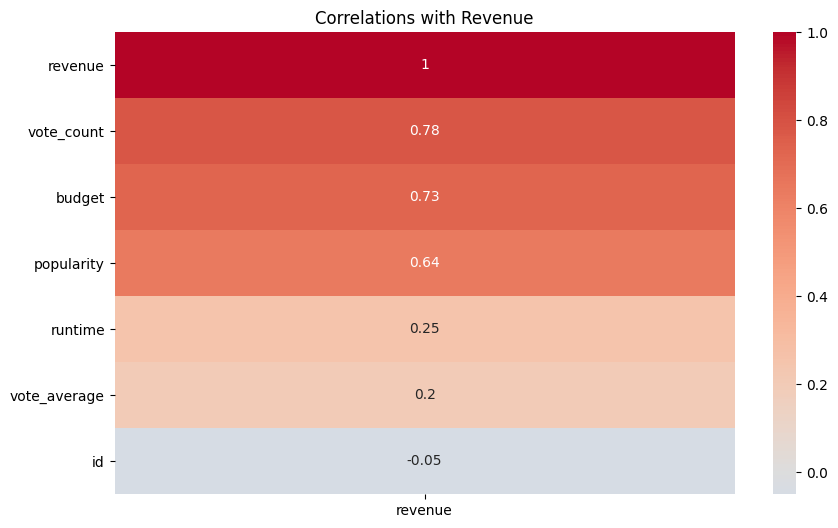

In [21]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.makedirs('/workspace/Film_Hit_prediction/outputs/figures', exist_ok=True)


plt.figure(figsize=(10, 6))
sns.heatmap(df_movies.corr()[['revenue']].sort_values(by='revenue', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlations with Revenue')

plt.show()


Save


In [23]:
os.makedirs('/workspace/Film_Hit_prediction/outputs/figures', exist_ok=True)


plt.figure(figsize=(10, 6))
sns.heatmap(df_movies.corr()[['revenue']].sort_values(by='revenue', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlations with Revenue')

plt.savefig('outputs/figures/revenue_correlations_heatmap.png', 
            dpi=300, 
            bbox_inches='tight')
plt.close() 

print("Plot saved successfully.")

Plot saved successfully.


Barplot of Correlation with Revenue

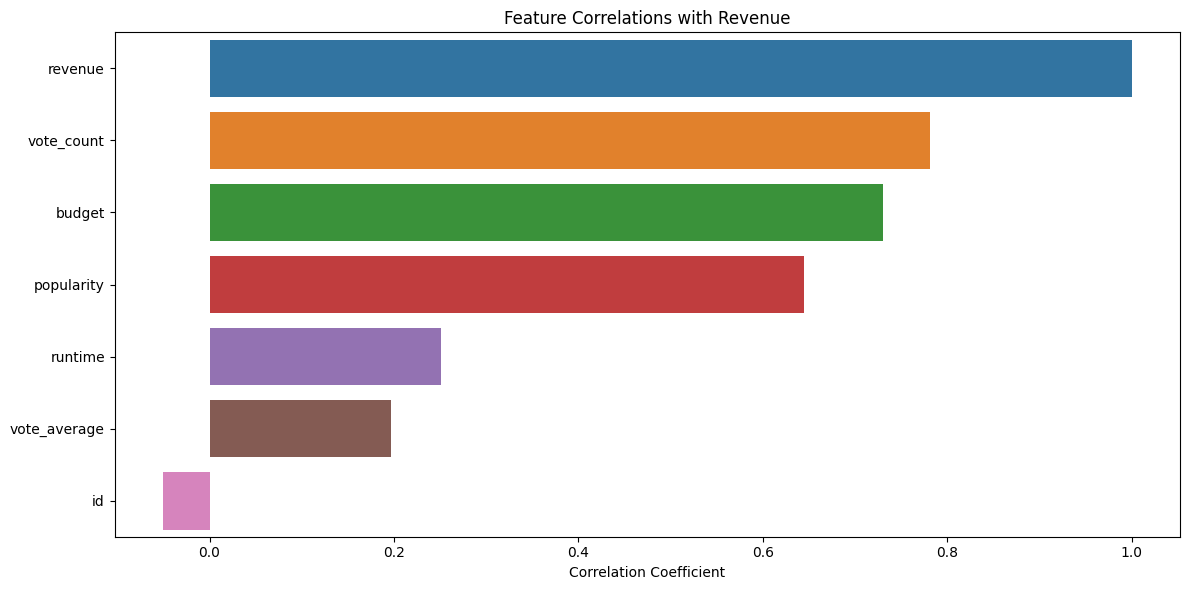

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

correlations = df_movies.corr()['revenue'].sort_values(ascending=False)
sns.barplot(x=correlations.values, y=correlations.index)

plt.title('Feature Correlations with Revenue')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()

plt.show()



Save

In [25]:
plt.figure(figsize=(12, 6))

correlations = df_movies.corr()['revenue'].sort_values(ascending=False)
sns.barplot(x=correlations.values, y=correlations.index)

plt.title('Feature Correlations with Revenue')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()

plt.savefig('/workspace/Film_Hit_prediction/outputs/figures/feature_revenue_correlations_barplot.png', 
            dpi=300, 
            bbox_inches='tight')
plt.close()

print("Plot saved successfully.")

Plot saved successfully.


---

# Correlation budget revenue

Plot shows relationship between budget and revenue


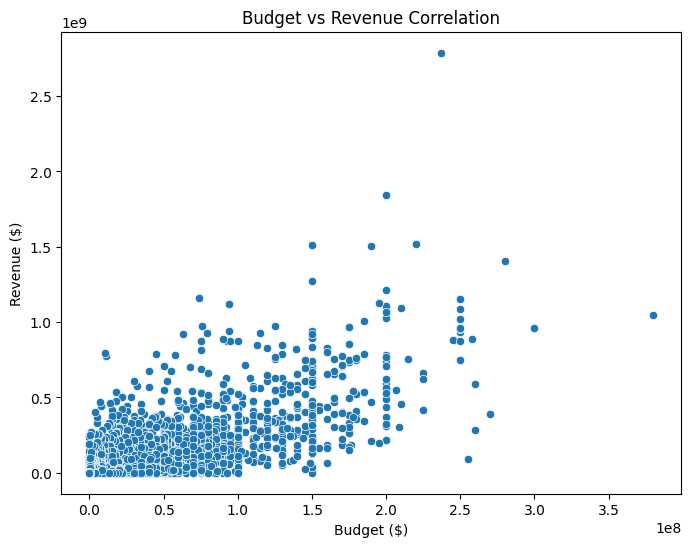

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_movies, x='budget', y='revenue')
plt.title('Budget vs Revenue Correlation')
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
print("Plot shows relationship between budget and revenue")

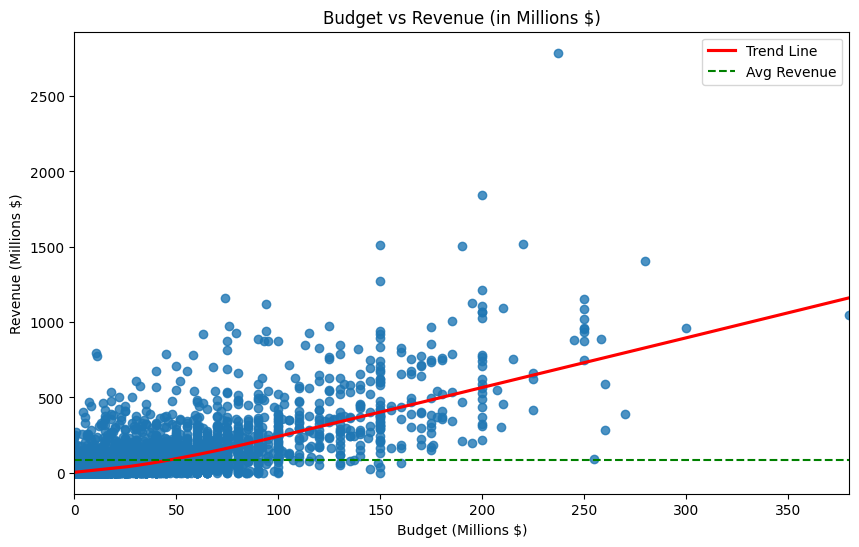

In [27]:
# First create df_millions
df_millions = df_movies.copy()
df_millions['budget_millions'] = df_millions['budget'] / 1000000
df_millions['revenue_millions'] = df_millions['revenue'] / 1000000

# Then create the plot
plt.figure(figsize=(10, 6))
sns.regplot(data=df_millions, x='budget_millions', y='revenue_millions',
           scatter=True, lowess=True,
           line_kws={'color': 'red', 'label': 'Trend Line'})
plt.axhline(y=df_millions['revenue_millions'].mean(),
           color='green', linestyle='--', label='Avg Revenue')
plt.title('Budget vs Revenue (in Millions $)')
plt.xlabel('Budget (Millions $)')
plt.ylabel('Revenue (Millions $)')
plt.legend()

plt.show()


save

In [28]:
# First create df_millions
df_millions = df_movies.copy()
df_millions['budget_millions'] = df_millions['budget'] / 1000000
df_millions['revenue_millions'] = df_millions['revenue'] / 1000000

# Then create the plot
plt.figure(figsize=(10, 6))
sns.regplot(data=df_millions, x='budget_millions', y='revenue_millions',
           scatter=True, lowess=True,
           line_kws={'color': 'red', 'label': 'Trend Line'})
plt.axhline(y=df_millions['revenue_millions'].mean(),
           color='green', linestyle='--', label='Avg Revenue')
plt.title('Budget vs Revenue (in Millions $)')
plt.xlabel('Budget (Millions $)')
plt.ylabel('Revenue (Millions $)')
plt.legend()

plt.savefig('outputs/figures/Budget_vs_Revenue_scatter_points.png', 
            dpi=300, 
            bbox_inches='tight')
plt.close() 

print("Plot saved successfully.")

Plot saved successfully.


---


# Corelation gengre revenue

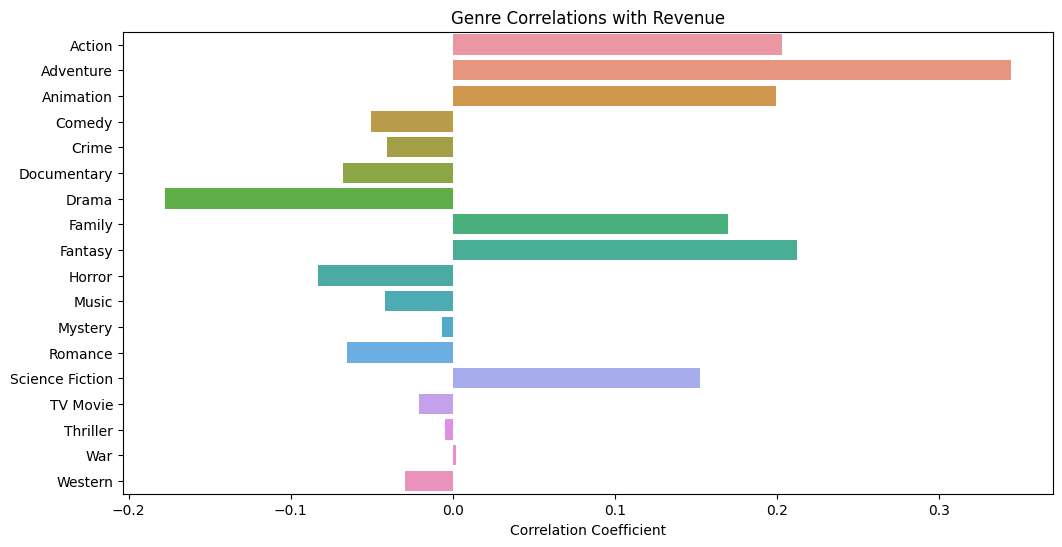

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
                'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 
                'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 
                'Thriller', 'War', 'Western']

plt.figure(figsize=(12, 6))
genre_correlations = df_new[genre_columns + ['revenue']].corr()['revenue'][:-1]
sns.barplot(x=genre_correlations.values, y=genre_correlations.index)
plt.title('Genre Correlations with Revenue')
plt.xlabel('Correlation Coefficient')

plt.show()


save

In [35]:
genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
                'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 
                'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 
                'Thriller', 'War', 'Western']

plt.figure(figsize=(12, 6))
genre_correlations = df_new[genre_columns + ['revenue']].corr()['revenue'][:-1]
sns.barplot(x=genre_correlations.values, y=genre_correlations.index)
plt.title('Genre Correlations with Revenue')
plt.xlabel('Correlation Coefficient')

plt.savefig('outputs/figures/Genre_correlation_ with_ Revenue_plot.png', 
            dpi=300, 
            bbox_inches='tight')
plt.close() 

print("Plot saved successfully.")

Plot saved successfully.


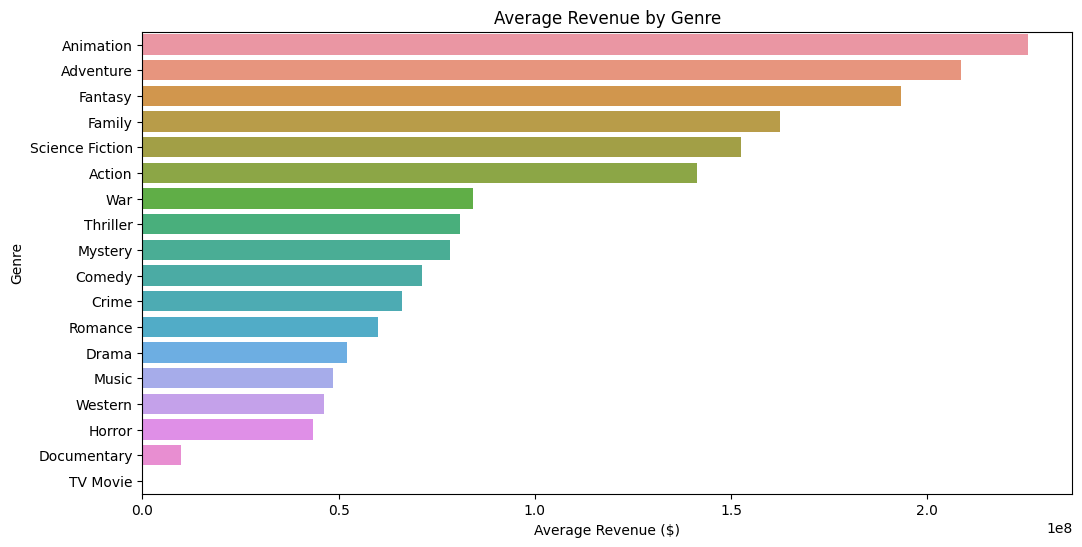

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean revenue for each individual genre
genre_means = {
   genre: df_new[df_new[genre] == 1]['revenue'].mean()
   for genre in ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
                'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 
                'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 
                'Thriller', 'War', 'Western']
}

# Convert to Series and sort
genre_revenue = pd.Series(genre_means).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_revenue.values, y=genre_revenue.index)
plt.title('Average Revenue by Genre')
plt.xlabel('Average Revenue ($)')
plt.ylabel('Genre')

plt.show()


Save

In [39]:
# Calculate mean revenue for each individual genre
genre_means = {
   genre: df_new[df_new[genre] == 1]['revenue'].mean()
   for genre in ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
                'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 
                'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 
                'Thriller', 'War', 'Western']
}

# Convert to Series and sort
genre_revenue = pd.Series(genre_means).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_revenue.values, y=genre_revenue.index)
plt.title('Average Revenue by Genre')
plt.xlabel('Average Revenue ($)')
plt.ylabel('Genre')

plt.savefig('outputs/figures/Average_Revenue_by_Genre_plot.png', 
            dpi=300, 
            bbox_inches='tight')
plt.close()

print("Plot saved successfully.")

Plot saved successfully.


---

# Correlation language revenue

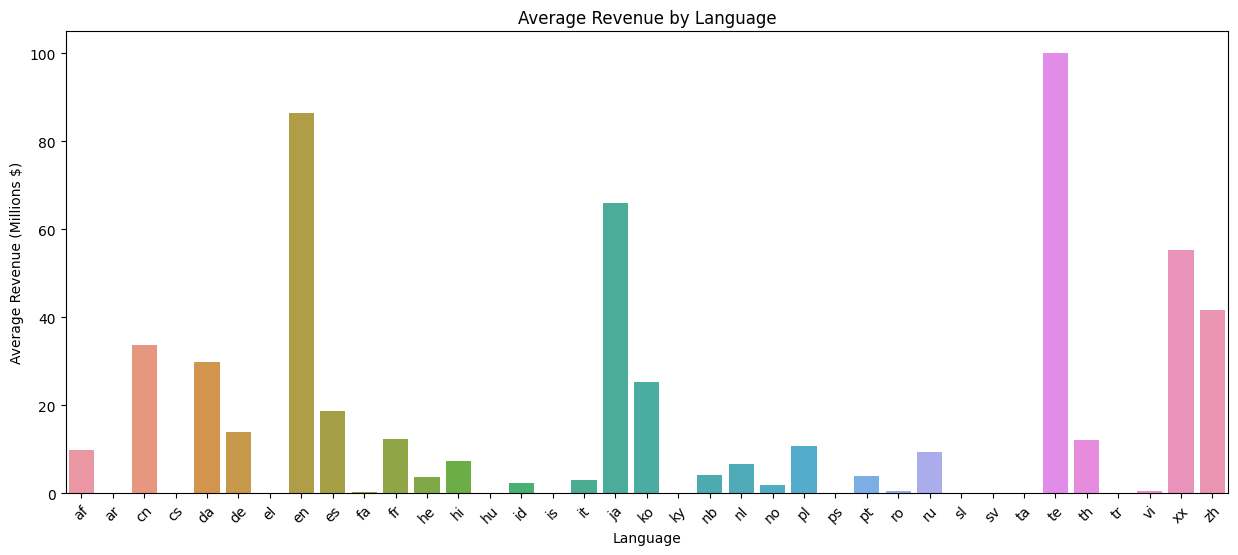

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
df_movies['original_language'] = df_movies['original_language'].fillna('unknown')
lang_revenue = df_movies.groupby('original_language')['revenue'].mean() / 1000000
sns.barplot(x=lang_revenue.index, y=lang_revenue.values)
plt.title('Average Revenue by Language')
plt.xlabel('Language')
plt.ylabel('Average Revenue (Millions $)')
plt.xticks(rotation=45)

plt.show()


Save

In [41]:
plt.figure(figsize=(15, 6))
df_movies['original_language'] = df_movies['original_language'].fillna('unknown')
lang_revenue = df_movies.groupby('original_language')['revenue'].mean() / 1000000
sns.barplot(x=lang_revenue.index, y=lang_revenue.values)
plt.title('Average Revenue by Language')
plt.xlabel('Language')
plt.ylabel('Average Revenue (Millions $)')
plt.xticks(rotation=45)

plt.savefig('outputs/figures/Average_Revenue_by_Language.png', 
            dpi=300, 
            bbox_inches='tight')
plt.close()

print("Plot saved successfully.")

Plot saved successfully.


---

# EDA on selected variables

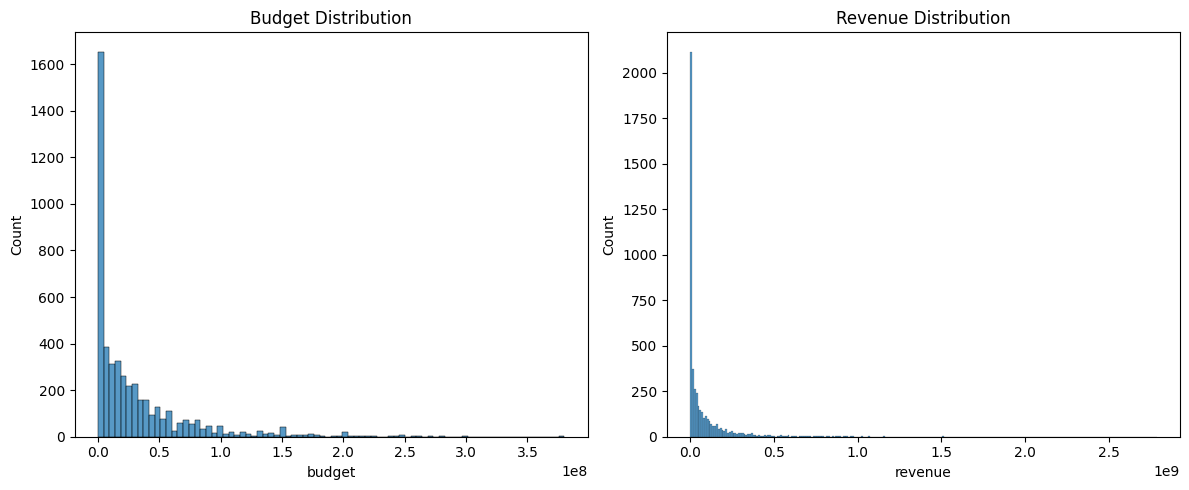

In [42]:
# For budget and revenue distributions:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_movies['budget'])
plt.title('Budget Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_movies['revenue'])
plt.title('Revenue Distribution')
plt.tight_layout()

plt.show()


Genre combination analysis

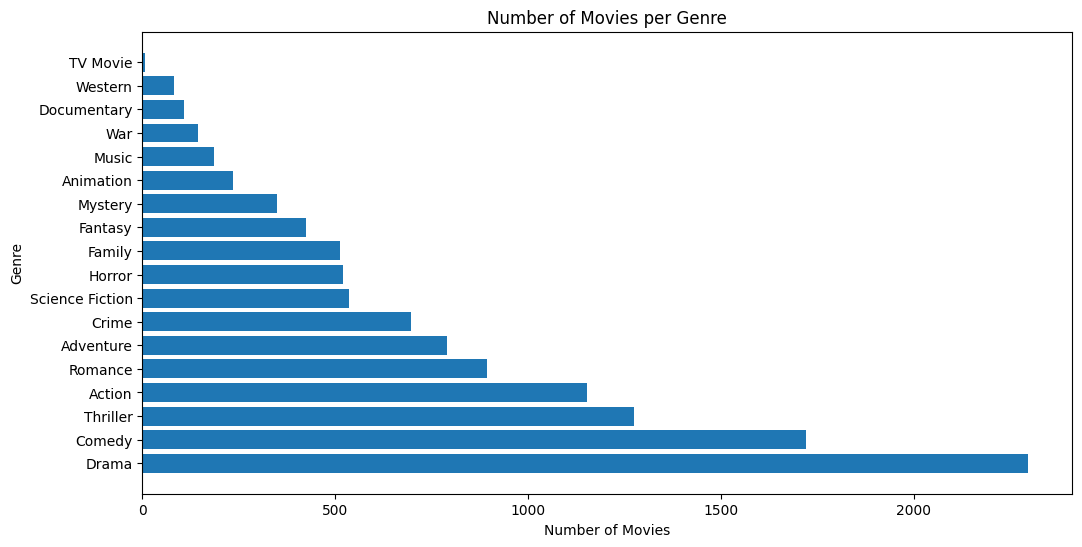

In [43]:
plt.figure(figsize=(12, 6))
genre_totals = df_new[['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
                        'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror',
                        'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
                        'Thriller', 'War', 'Western']].sum().sort_values(ascending=False)

plt.barh(genre_totals.index, genre_totals.values)
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')

plt.show()


save

In [45]:
plt.figure(figsize=(12, 6))
genre_totals = df_new[['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
                        'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror',
                        'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
                        'Thriller', 'War', 'Western']].sum().sort_values(ascending=False)

plt.barh(genre_totals.index, genre_totals.values)
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')

plt.savefig('outputs/figures/Number_of_movies_produced_by_genre.png', 
            dpi=300, 
            bbox_inches='tight')
plt.close()

print("Plot saved successfully.")

Plot saved successfully.


Revenue outliers analysis

Text(0.5, 1.0, 'Revenue Outliers')

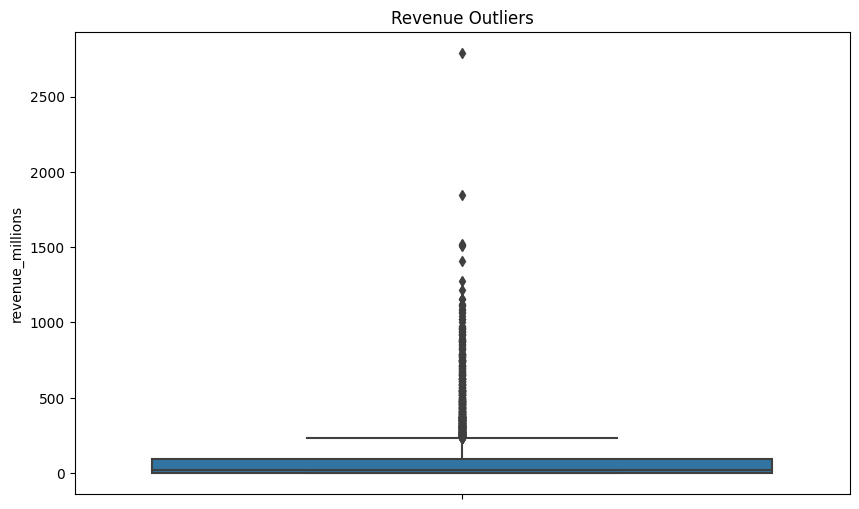

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df_millions['revenue_millions'])
plt.title('Revenue Outliers')

Correlation runtime revenue

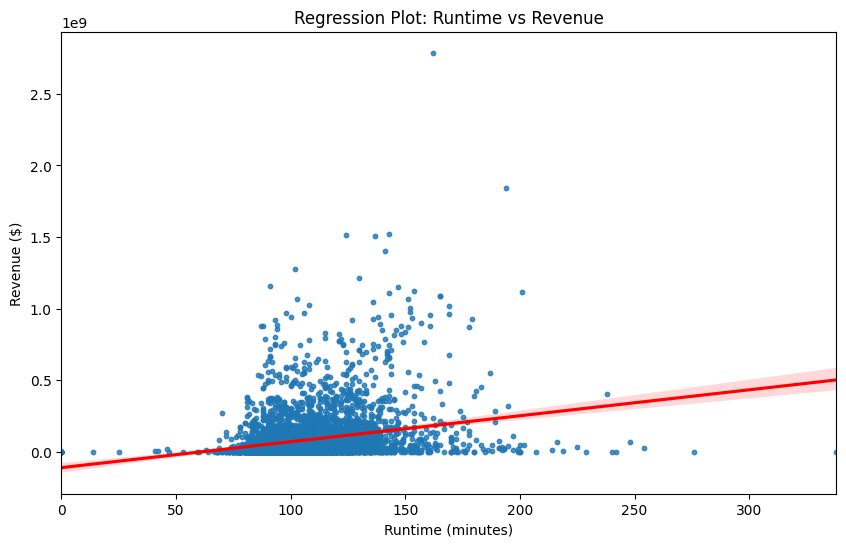

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your dataset if needed)
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Ensure that the dataset has 'runtime' and 'revenue' columns
if 'runtime' in df_new.columns and 'revenue' in df_new.columns:
    
    # Create a regression plot to visualize the relationship between runtime and revenue
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df_new, x='runtime', y='revenue', scatter_kws={'s': 10}, line_kws={'color': 'red'})
    
    plt.title('Regression Plot: Runtime vs Revenue')
    plt.xlabel('Runtime (minutes)')
    plt.ylabel('Revenue ($)')

    # Save the plot as a PNG file in the specified 'figures' directory
    plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/runtime_vs_revenue_plot.png', bbox_inches='tight')
    
    plt.show()

else:
    print("Columns 'runtime' and/or 'revenue' are missing from the dataset.")


Directors versus revenue

crew_Director_James Cameron        0.177895
crew_Director_Peter Jackson        0.170240
crew_Director_Michael Bay          0.124094
crew_Director_Steven Spielberg     0.118439
crew_Director_George Lucas         0.116082
crew_Director_Christopher Nolan    0.111914
crew_Director_Francis Lawrence     0.100751
crew_Director_Carlos Saldanha      0.094434
crew_Director_Gore Verbinski       0.087178
crew_Director_Andrew Adamson       0.087048
crew_Director_Eric Darnell         0.079988
crew_Director_Chris Columbus       0.075442
crew_Director_John Lasseter        0.073137
crew_Director_Roland Emmerich      0.072071
crew_Director_Sam Mendes           0.071643
crew_Director_Brad Bird            0.070209
crew_Director_Jon Favreau          0.069687
crew_Director_Bryan Singer         0.067412
crew_Director_Zack Snyder          0.063688
crew_Director_Robert Zemeckis      0.062038
Name: revenue, dtype: float64


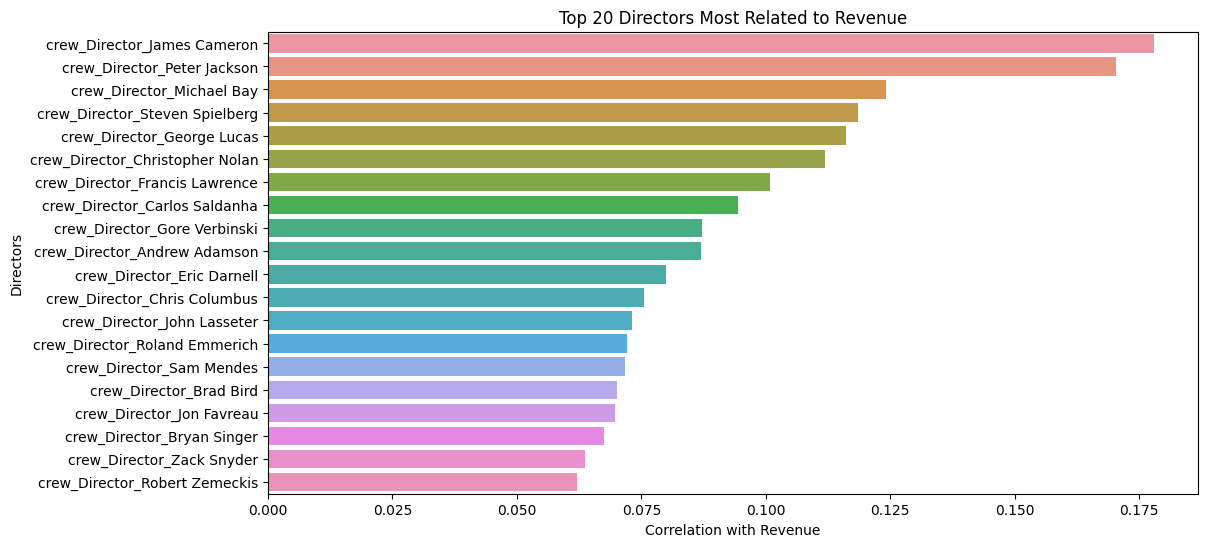

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Ensure that the dataset has 'revenue' column
if 'revenue' in df_new.columns:
    
    # Dynamically select all columns related to crew_director (assuming they are one-hot encoded)
    director_columns = [col for col in df_new.columns if 'crew_Director' in col]

    # Calculate the correlation between the crew_director columns and 'revenue'
    director_correlations = df_new[director_columns + ['revenue']].corr()['revenue'][:-1]  # Exclude 'revenue' itself

    # Sort correlations and get the top 20 directors
    top_20_directors = director_correlations.sort_values(ascending=False).head(20)

    # Display the top 20 directors
    print(top_20_directors)

    # Create a bar plot to visualize the correlations
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_20_directors.values, y=top_20_directors.index)
    plt.title('Top 20 Directors Most Related to Revenue')
    plt.xlabel('Correlation with Revenue')
    plt.ylabel('Directors')

    # Save the plot as a PNG file in the specified 'figures' directory
    plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/top_20_directors_vs_revenue.png', bbox_inches='tight')

    # Show the plot
    plt.show()

else:
    print("Column 'revenue' is missing from the dataset.")


Correlation cast to popularity

cast_Samuel L. Jackson    67
cast_Robert De Niro       57
cast_Bruce Willis         51
cast_Matt Damon           48
cast_Morgan Freeman       46
cast_Steve Buscemi        43
cast_Liam Neeson          41
cast_Owen Wilson          40
cast_Johnny Depp          40
cast_Alec Baldwin         39
cast_Nicolas Cage         39
cast_John Goodman         39
cast_Stanley Tucci        38
cast_Jim Broadbent        38
cast_Brad Pitt            38
cast_Willem Dafoe         38
cast_Paul Giamatti        37
cast_Will Ferrell         37
cast_Richard Jenkins      36
cast_Susan Sarandon       36
dtype: int64


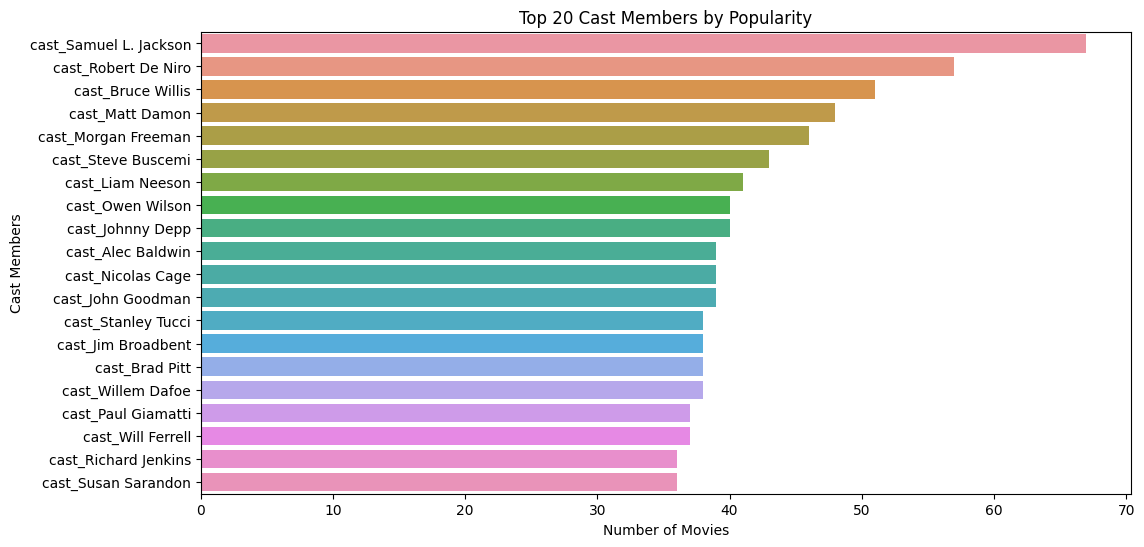

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Dynamically select all columns related to 'cast_' (cast members)
cast_columns = [col for col in df_new.columns if col.startswith('cast_')]

# Calculate the popularity score by counting the number of movies each cast member appears in (sum of '1's in the one-hot encoding)
cast_popularity = df_new[cast_columns].sum()

# Sort the cast members by their popularity score (in descending order)
top_20_cast_by_popularity = cast_popularity.sort_values(ascending=False).head(20)

# Display the top 20 cast members by popularity
print(top_20_cast_by_popularity)

# Create a bar plot to visualize the popularity of the top 20 cast members
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_cast_by_popularity.values, y=top_20_cast_by_popularity.index)
plt.title('Top 20 Cast Members by Popularity')
plt.xlabel('Number of Movies')
plt.ylabel('Cast Members')

# Save the plot as a PNG file in the specified 'figures' directory
plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/top_20_cast_by_popularity.png', bbox_inches='tight')

# Show the plot
plt.show()


cast to revenue

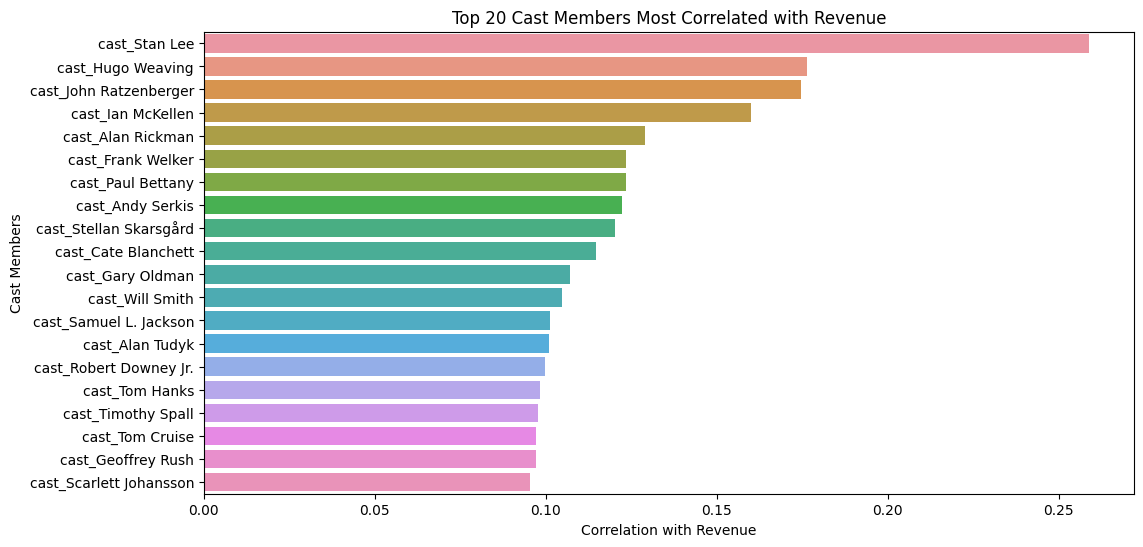

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Dynamically select all columns related to 'cast_' (cast members)
cast_columns = [col for col in df_new.columns if col.startswith('cast_')]

# Calculate the correlation between each cast member (individual cast columns) and 'revenue'
cast_revenue_correlations = df_new[cast_columns + ['revenue']].corr()['revenue'][:-1]  # Exclude 'revenue' itself

# Sort the correlations in descending order and take the top 20
top_20_cast_revenue = cast_revenue_correlations.sort_values(ascending=False).head(20)

# Create a bar plot to visualize the top 20 cast members most correlated with revenue
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_cast_revenue.values, y=top_20_cast_revenue.index)
plt.title('Top 20 Cast Members Most Correlated with Revenue')
plt.xlabel('Correlation with Revenue')
plt.ylabel('Cast Members')

# Save the plot as a PNG file in the specified 'figures' directory
plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/cast_vs_revenue.png', bbox_inches='tight')

# Show the plot
plt.show()


writer to revenue

crew_Writer_M. Night Shyamalan    0.054627
crew_Writer_Quentin Tarantino     0.018406
crew_Writer_Luc Besson            0.007593
crew_Writer_Ethan Coen           -0.002847
crew_Writer_Joel Coen            -0.002847
crew_Writer_Robert Rodriguez     -0.004798
crew_Writer_Woody Allen          -0.004891
crew_Writer_David Zucker         -0.007456
crew_Writer_Tyler Perry          -0.008354
crew_Writer_Kevin Smith          -0.013274
crew_Writer_Mike Leigh           -0.015382
Name: revenue, dtype: float64


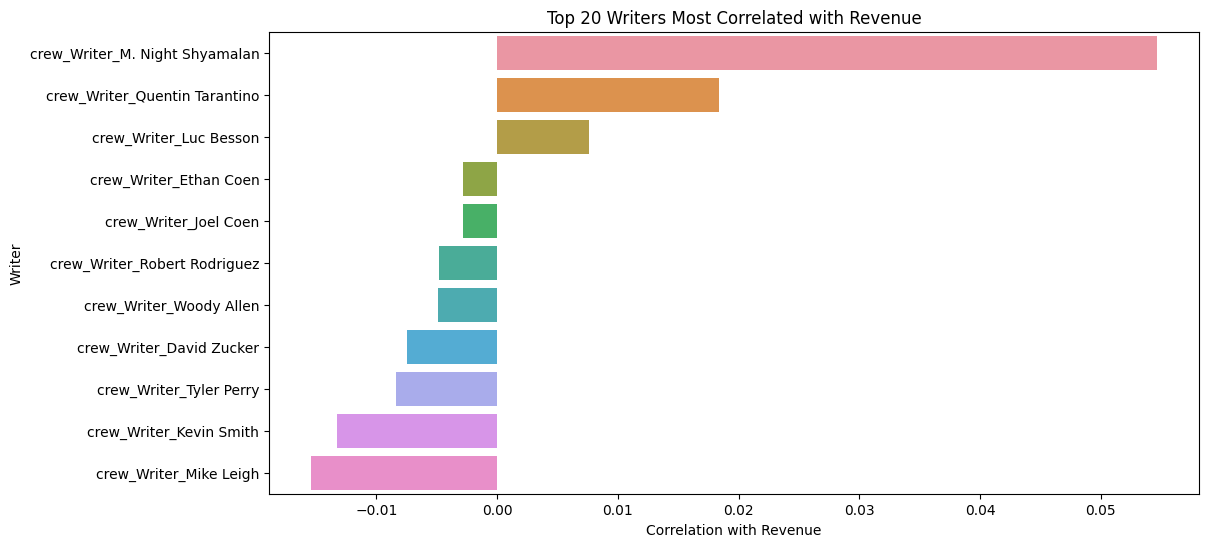

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Ensure that the dataset has 'revenue' column
if 'revenue' in df_new.columns:
    
    # Dynamically select all columns related to 'crew_Writer_' (writer columns)
    writer_columns = [col for col in df_new.columns if col.startswith('crew_Writer')]

    # Calculate the correlation between each writer column and 'revenue'
    writer_revenue_correlations = df_new[writer_columns + ['revenue']].corr()['revenue'][:-1]  # Exclude 'revenue' itself
    
    # Sort the correlations in descending order
    writer_revenue_sorted = writer_revenue_correlations.sort_values(ascending=False)
    
    # Display the top correlated writers
    print(writer_revenue_sorted.head(20))  # Top 20 writers with highest correlation to revenue

    # Create a bar plot to visualize the correlation of each writer with revenue
    plt.figure(figsize=(12, 6))
    sns.barplot(x=writer_revenue_sorted.head(20).values, y=writer_revenue_sorted.head(20).index)
    plt.title('Top 20 Writers Most Correlated with Revenue')
    plt.xlabel('Correlation with Revenue')
    plt.ylabel('Writer')
    
    # Save the plot as a PNG file in the specified 'figures' directory
    plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/writer_vs_revenue.png', bbox_inches='tight')

    # Show the plot
    plt.show()

else:
    print("Column 'revenue' or 'crew_Writer' is missing from the dataset.")


producers to revenue

crew_Producer_Kevin Feige             0.223183
crew_Producer_James Cameron           0.204380
crew_Producer_Peter Jackson           0.175474
crew_Producer_David Heyman            0.159591
crew_Producer_Christopher Nolan       0.140052
crew_Producer_Emma Thomas             0.139461
crew_Producer_Ian Bryce               0.133469
crew_Producer_Fran Walsh              0.125595
crew_Producer_Barbara Broccoli        0.125268
crew_Producer_Carolynne Cunningham    0.120186
crew_Producer_Don Murphy              0.114650
crew_Producer_Michael G. Wilson       0.113627
crew_Producer_Rick McCallum           0.112528
crew_Producer_Avi Arad                0.110848
crew_Producer_Barrie M. Osborne       0.109508
crew_Producer_Lorne Orleans           0.108747
crew_Producer_Frank Marshall          0.108308
crew_Producer_Jerry Bruckheimer       0.104036
crew_Producer_Charles Roven           0.102493
crew_Producer_Laura Ziskin            0.096753
Name: revenue, dtype: float64


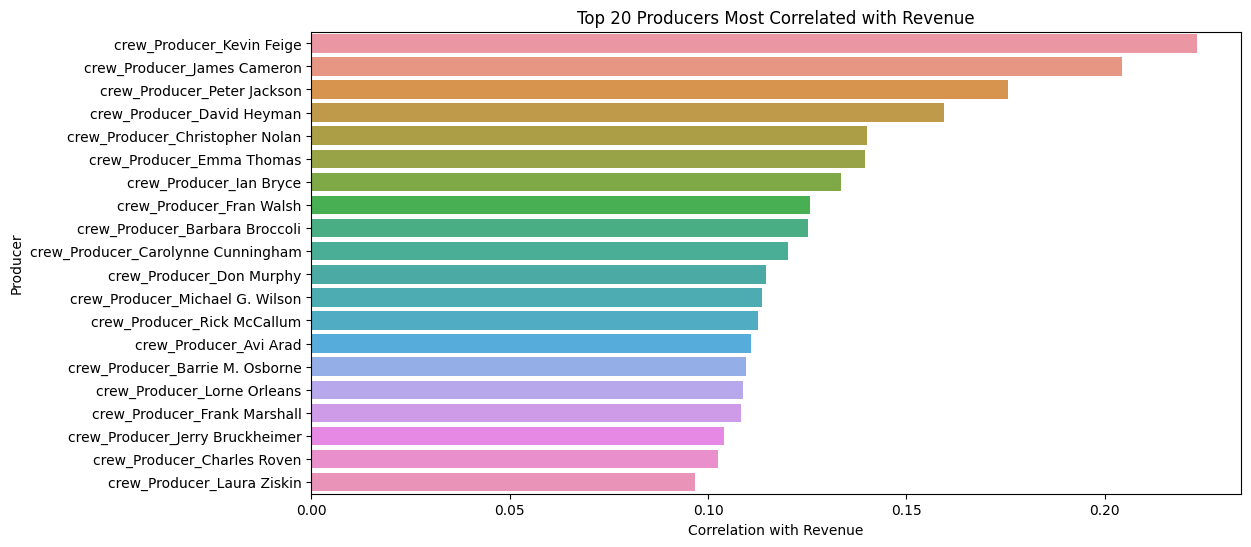

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Ensure that the dataset has 'revenue' column
if 'revenue' in df_new.columns:
    
    # Dynamically select all columns related to 'crew_Producer_' (producer columns)
    producer_columns = [col for col in df_new.columns if col.startswith('crew_Producer')]

    # Calculate the correlation between each producer column and 'revenue'
    producer_revenue_correlations = df_new[producer_columns + ['revenue']].corr()['revenue'][:-1]  # Exclude 'revenue' itself
    
    # Sort the correlations in descending order
    producer_revenue_sorted = producer_revenue_correlations.sort_values(ascending=False)
    
    # Display the top correlated producers
    print(producer_revenue_sorted.head(20))  # Top 20 producers with highest correlation to revenue

    # Create a bar plot to visualize the correlation of each producer with revenue
    plt.figure(figsize=(12, 6))
    sns.barplot(x=producer_revenue_sorted.head(20).values, y=producer_revenue_sorted.head(20).index)
    plt.title('Top 20 Producers Most Correlated with Revenue')
    plt.xlabel('Correlation with Revenue')
    plt.ylabel('Producer')
    
    # Save the plot as a PNG file in the specified 'figures' directory
    plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/producer_vs_revenue.png', bbox_inches='tight')

    # Show the plot
    plt.show()

else:
    print("Column 'revenue' or 'crew_Producer' is missing from the dataset.")


company

company_Marvel Studios                            0.223183
company_Pixar Animation Studios                   0.188467
company_WingNut Films                             0.165206
company_DreamWorks Animation                      0.162864
company_Walt Disney Pictures                      0.162131
company_Revolution Sun Studios                    0.154694
company_Amblin Entertainment                      0.153435
company_Heyday Films                              0.133890
company_Legendary Pictures                        0.130251
company_Twentieth Century Fox Film Corporation    0.127386
company_Lucasfilm                                 0.123112
company_Warner Bros.                              0.117564
company_Dentsu                                    0.111405
company_Jerry Bruckheimer Films                   0.106302
company_Twentieth Century Fox Animation           0.105961
company_Marvel Enterprises                        0.104550
company_DC Entertainment                          0.1043

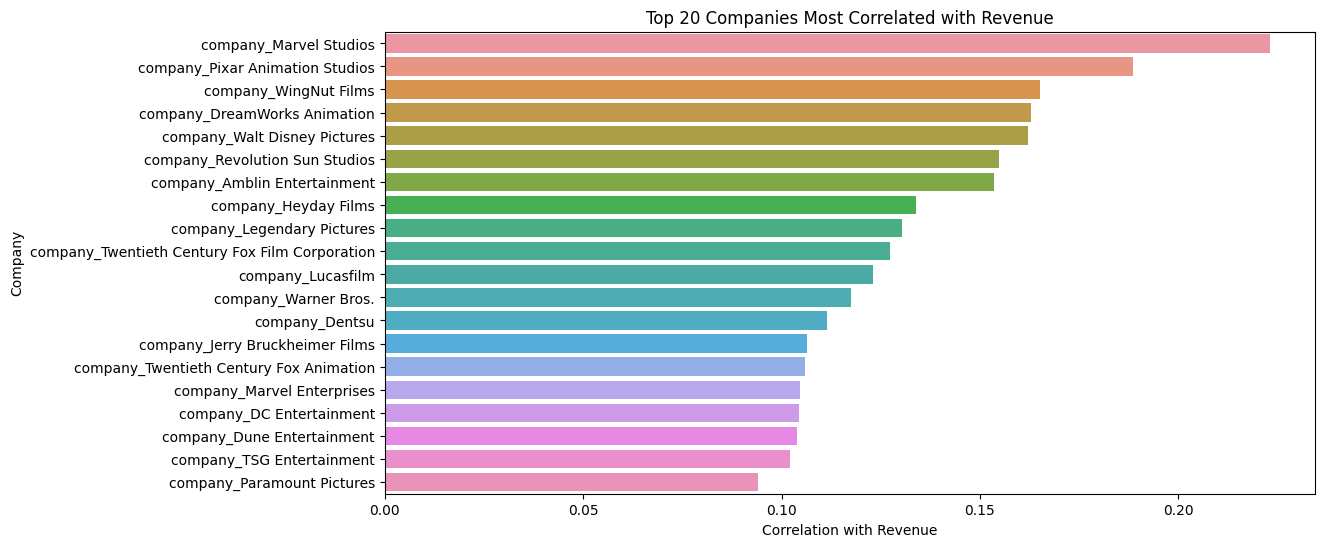

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Ensure that the dataset has 'revenue' column
if 'revenue' in df_new.columns:
    
    # Dynamically select all columns related to 'company_' (company columns)
    company_columns = [col for col in df_new.columns if col.startswith('company_')]

    # Calculate the correlation between each company column and 'revenue'
    company_revenue_correlations = df_new[company_columns + ['revenue']].corr()['revenue'][:-1]  # Exclude 'revenue' itself
    
    # Sort the correlations in descending order
    company_revenue_sorted = company_revenue_correlations.sort_values(ascending=False)
    
    # Display the top correlated companies
    print(company_revenue_sorted.head(20))  # Top 20 companies with highest correlation to revenue

    # Create a bar plot to visualize the correlation of each company with revenue
    plt.figure(figsize=(12, 6))
    sns.barplot(x=company_revenue_sorted.head(20).values, y=company_revenue_sorted.head(20).index)
    plt.title('Top 20 Companies Most Correlated with Revenue')
    plt.xlabel('Correlation with Revenue')
    plt.ylabel('Company')
    
    # Save the plot as a PNG file in the specified 'figures' directory
    plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/company_vs_revenue.png', bbox_inches='tight')

    # Show the plot
    plt.show()

else:
    print("Column 'revenue' or 'company' is missing from the dataset.")


country

Whis is most relevant between director, cast, writer , prducer to revenue

      Group  Correlation with Revenue
0      Cast                  0.030471
3  Producer                  0.014613
1  Director                  0.013666
2    Writer                  0.001889


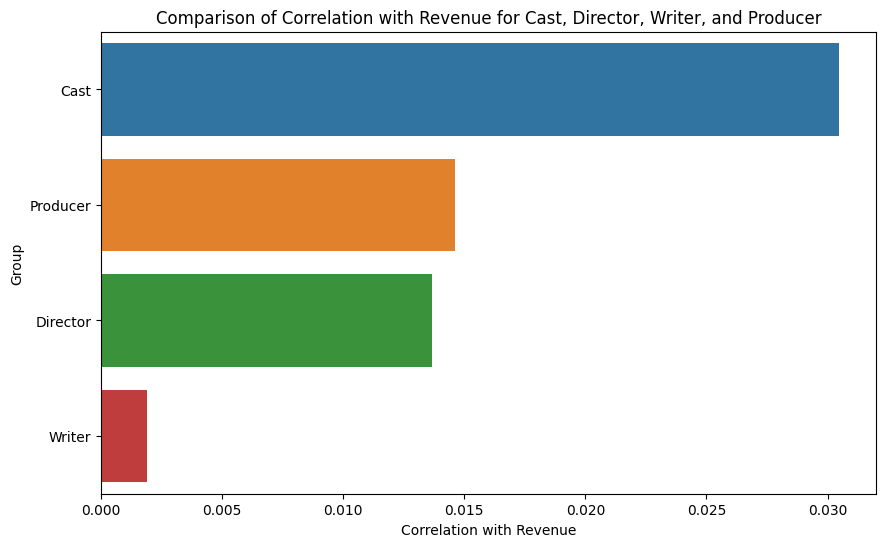

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Ensure that the dataset has 'revenue' column
if 'revenue' in df_new.columns:
    
    # Dynamically select all columns related to 'cast_', 'crew_director', 'crew_writer', 'crew_producer'
    cast_columns = [col for col in df_new.columns if col.startswith('cast_')]
    director_columns = [col for col in df_new.columns if col.startswith('crew_Director')]
    writer_columns = [col for col in df_new.columns if col.startswith('crew_Writer')]
    producer_columns = [col for col in df_new.columns if col.startswith('crew_Producer')]

    # Calculate the correlation for each group with 'revenue'
    cast_revenue_corr = df_new[cast_columns + ['revenue']].corr()['revenue'][:-1].mean()  # Mean correlation of cast
    director_revenue_corr = df_new[director_columns + ['revenue']].corr()['revenue'][:-1].mean()  # Mean correlation of directors
    writer_revenue_corr = df_new[writer_columns + ['revenue']].corr()['revenue'][:-1].mean()  # Mean correlation of writers
    producer_revenue_corr = df_new[producer_columns + ['revenue']].corr()['revenue'][:-1].mean()  # Mean correlation of producers

    # Create a DataFrame to compare correlation values
    correlation_comparison = pd.DataFrame({
        'Group': ['Cast', 'Director', 'Writer', 'Producer'],
        'Correlation with Revenue': [cast_revenue_corr, director_revenue_corr, writer_revenue_corr, producer_revenue_corr]
    })

    # Sort the groups by their correlation with revenue
    correlation_comparison_sorted = correlation_comparison.sort_values(by='Correlation with Revenue', ascending=False)

    # Display the results
    print(correlation_comparison_sorted)

    # Create a bar plot to visualize the correlation of each group with revenue
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Correlation with Revenue', y='Group', data=correlation_comparison_sorted)
    plt.title('Comparison of Correlation with Revenue for Cast, Director, Writer, and Producer')
    plt.xlabel('Correlation with Revenue')
    plt.ylabel('Group')
    
    # Save the plot as a PNG file in the specified 'figures' directory
    plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/comparison_group_vs_revenue.png', bbox_inches='tight')

    # Show the plot
    plt.show()

else:
    print("Column 'revenue' is missing from the dataset.")


Conclusion:
Cast popularity and their relation to revenue are not overlapping

COMPANY VERSUS revenue

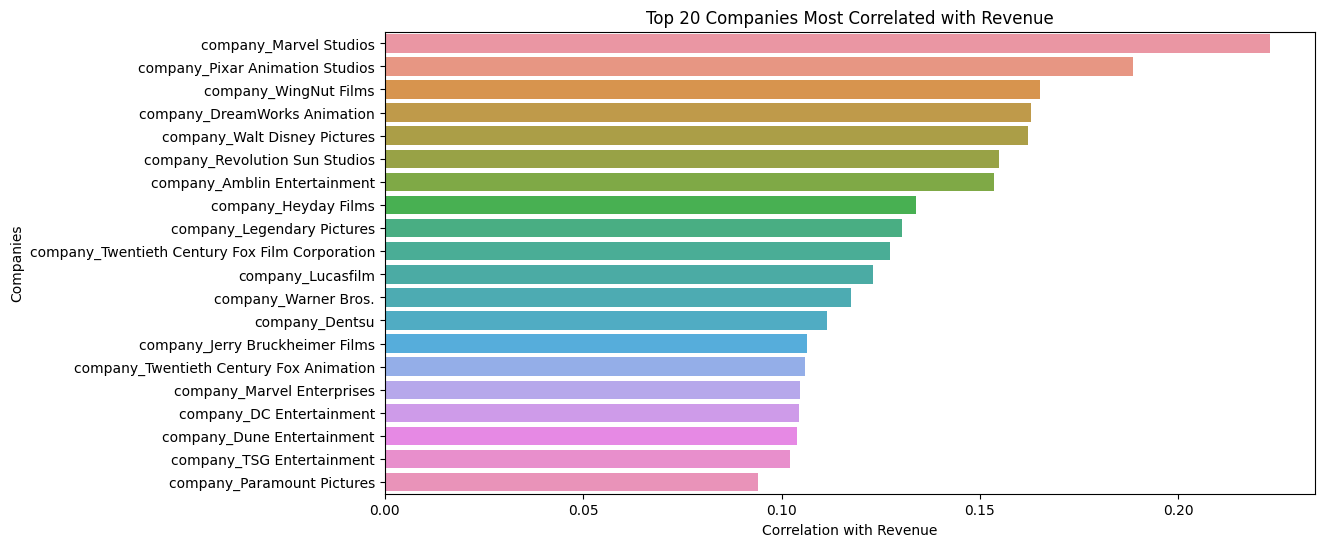

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_new = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/df_final_cleaned.pkl')

# Dynamically select all columns related to 'company_' (company columns)
company_columns = [col for col in df_new.columns if col.startswith('company_')]

# Calculate the correlation between each company column and 'revenue'
company_revenue_correlations = df_new[company_columns + ['revenue']].corr()['revenue'][:-1]  # Exclude 'revenue' itself

# Sort the correlations in descending order and take the top 20 companies
top_20_company_revenue = company_revenue_correlations.sort_values(ascending=False).head(20)

# Create a bar plot to visualize the top 20 companies most correlated with revenue
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_company_revenue.values, y=top_20_company_revenue.index)
plt.title('Top 20 Companies Most Correlated with Revenue')
plt.xlabel('Correlation with Revenue')
plt.ylabel('Companies')

# Save the plot as a PNG file in the specified 'figures' directory
plt.savefig('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/figures/company_vs_revenue.png', bbox_inches='tight')

# Show the plot
plt.show()


Company versus popularity

 Calculate average success ratio for each genre

# Calculate number and percentage of profitable movies

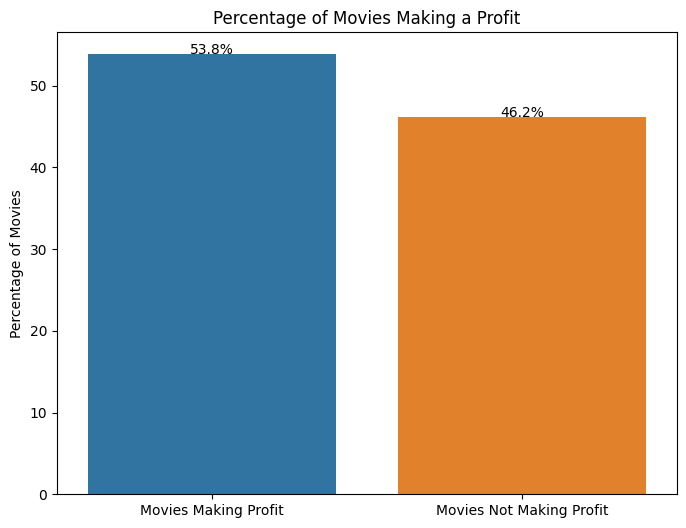

In [54]:
import seaborn as sns

# Calculate percentages
total = len(df_millions)
percent_profitable = (sum(df_millions['success_ratio'] > 1) / total) * 100
percent_not_profitable = 100 - percent_profitable

plt.figure(figsize=(8,6))
sns.barplot(x=['Movies Making Profit', 'Movies Not Making Profit'], 
          y=[percent_profitable, percent_not_profitable])
plt.title('Percentage of Movies Making a Profit')
plt.ylabel('Percentage of Movies')

# Add percentage labels
for i, v in enumerate([percent_profitable, percent_not_profitable]):
   plt.text(i, v, f'{v:.1f}%', ha='center')

plt.show()

save

In [55]:
# Save the figure

total = len(df_millions)
percent_profitable = (sum(df_millions['success_ratio'] > 1) / total) * 100
percent_not_profitable = 100 - percent_profitable

plt.figure(figsize=(8,6))
sns.barplot(x=['Movies Making Profit', 'Movies Not Making Profit'], 
          y=[percent_profitable, percent_not_profitable])
plt.title('Percentage of Movies Making a Profit')
plt.ylabel('Percentage of Movies')

# Add percentage labels
for i, v in enumerate([percent_profitable, percent_not_profitable]):
   plt.text(i, v, f'{v:.1f}%', ha='center')

plt.savefig('outputs/figures/Percentage_Movies_making_a_profit_plot.png', 
            dpi=300, 
            bbox_inches='tight')
plt.close()

print("Plot saved successfully.")

Plot saved successfully.


---

# Conclusions and Next steps

The correlations and plots interpretation converge. 
* About half of movies porduced make profit after making back their budget
* A churned customer typically has fiber optic.
* A churned customer typically doesn't have tech support.
* A churned customer doesn't have online security.
* A churned customer typically has low tenure levels.

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---